# Stat 517 Project #1

# Name - ABHISHEK KUMAR THAKUR
# Major - Materials Science & Engineering

## Question 2: Predicting Income >$50k or not

This study focuses on the US Adult Census dataset; a repository of 32,561 entires carefully extracted from 
the 1994 US Census database. We would like to determine if an individual has a salary greater 
than or less than $50,000 annually based on the variables provided. 

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings. 

The data can be retrieved as follows:


In [160]:
#Loading and displaying the data
import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Nominal Attributes
* **workclass**:
    + Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
Without-pay, Never-worked.
* **education**: 
    + Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **marital-status**:
    + Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: 
    + Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: 
    + Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Descriptions of an individual's race
    + White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: 
    + Male, Female
* **native-country**: 
    + United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hongkong, Holand-Netherlands.

### Continuous Attributes
* **age**
* **fnlwgt**
* **education-num**
* **capital-gain**
* **capital-loss**
* **hours-per-week**


# Solution

We will start solving this problem by import python tools for various data operations.
Numpy, Pandas and random for data analysis.
Seaborn and Matplotlib for data visualization.
Various models like logistic regression, support vector machines etc for data modelling.

In [161]:
#importing data analysis packages
import numpy as np
import pandas as pd
import random as rnd

#importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Dataset columns

In [162]:
#Printing the column values which are available in the dataset
print (adult.columns.values)
print ("-----------------------------------------------------------------------------------")
#Analysing the data carefully before modelling
print (adult.describe(include=['O']))

['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country' 'salary']
-----------------------------------------------------------------------------------
       workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  salary  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720  


# Playing around

We can use various tools for representing data effectively according to our interests.
For example, in the following cell we have extract salary from the dataset and arrange it in decending order.
We can do similar stuffs according to our need.

In [163]:
#Sorting the salary in decending order according to the education level.
#We can sort salary with respect to other column values too for analysing.
adult[['education', 'salary']].sort_values(by='salary', ascending = False)

,education,salary
32560,HS-grad,>50K
25061,Some-college,>50K
9827,Masters,>50K
9828,Doctorate,>50K
25072,HS-grad,>50K
25069,Assoc-acdm,>50K
9837,HS-grad,>50K
25065,Assoc-voc,>50K
25063,HS-grad,>50K
9842,Bachelors,>50K


# Data Modelling

In [164]:
#Starting modelling of the data
import seaborn as sns
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Representing data via PairPlot

We have done a pairplot in the given dataset on the basis of salary (which is our target attribute) to view the data effectively and analyze the dependence of various attributes over the target attribute.
We can set the size as well as change the colour according to our desire/requirement as well.

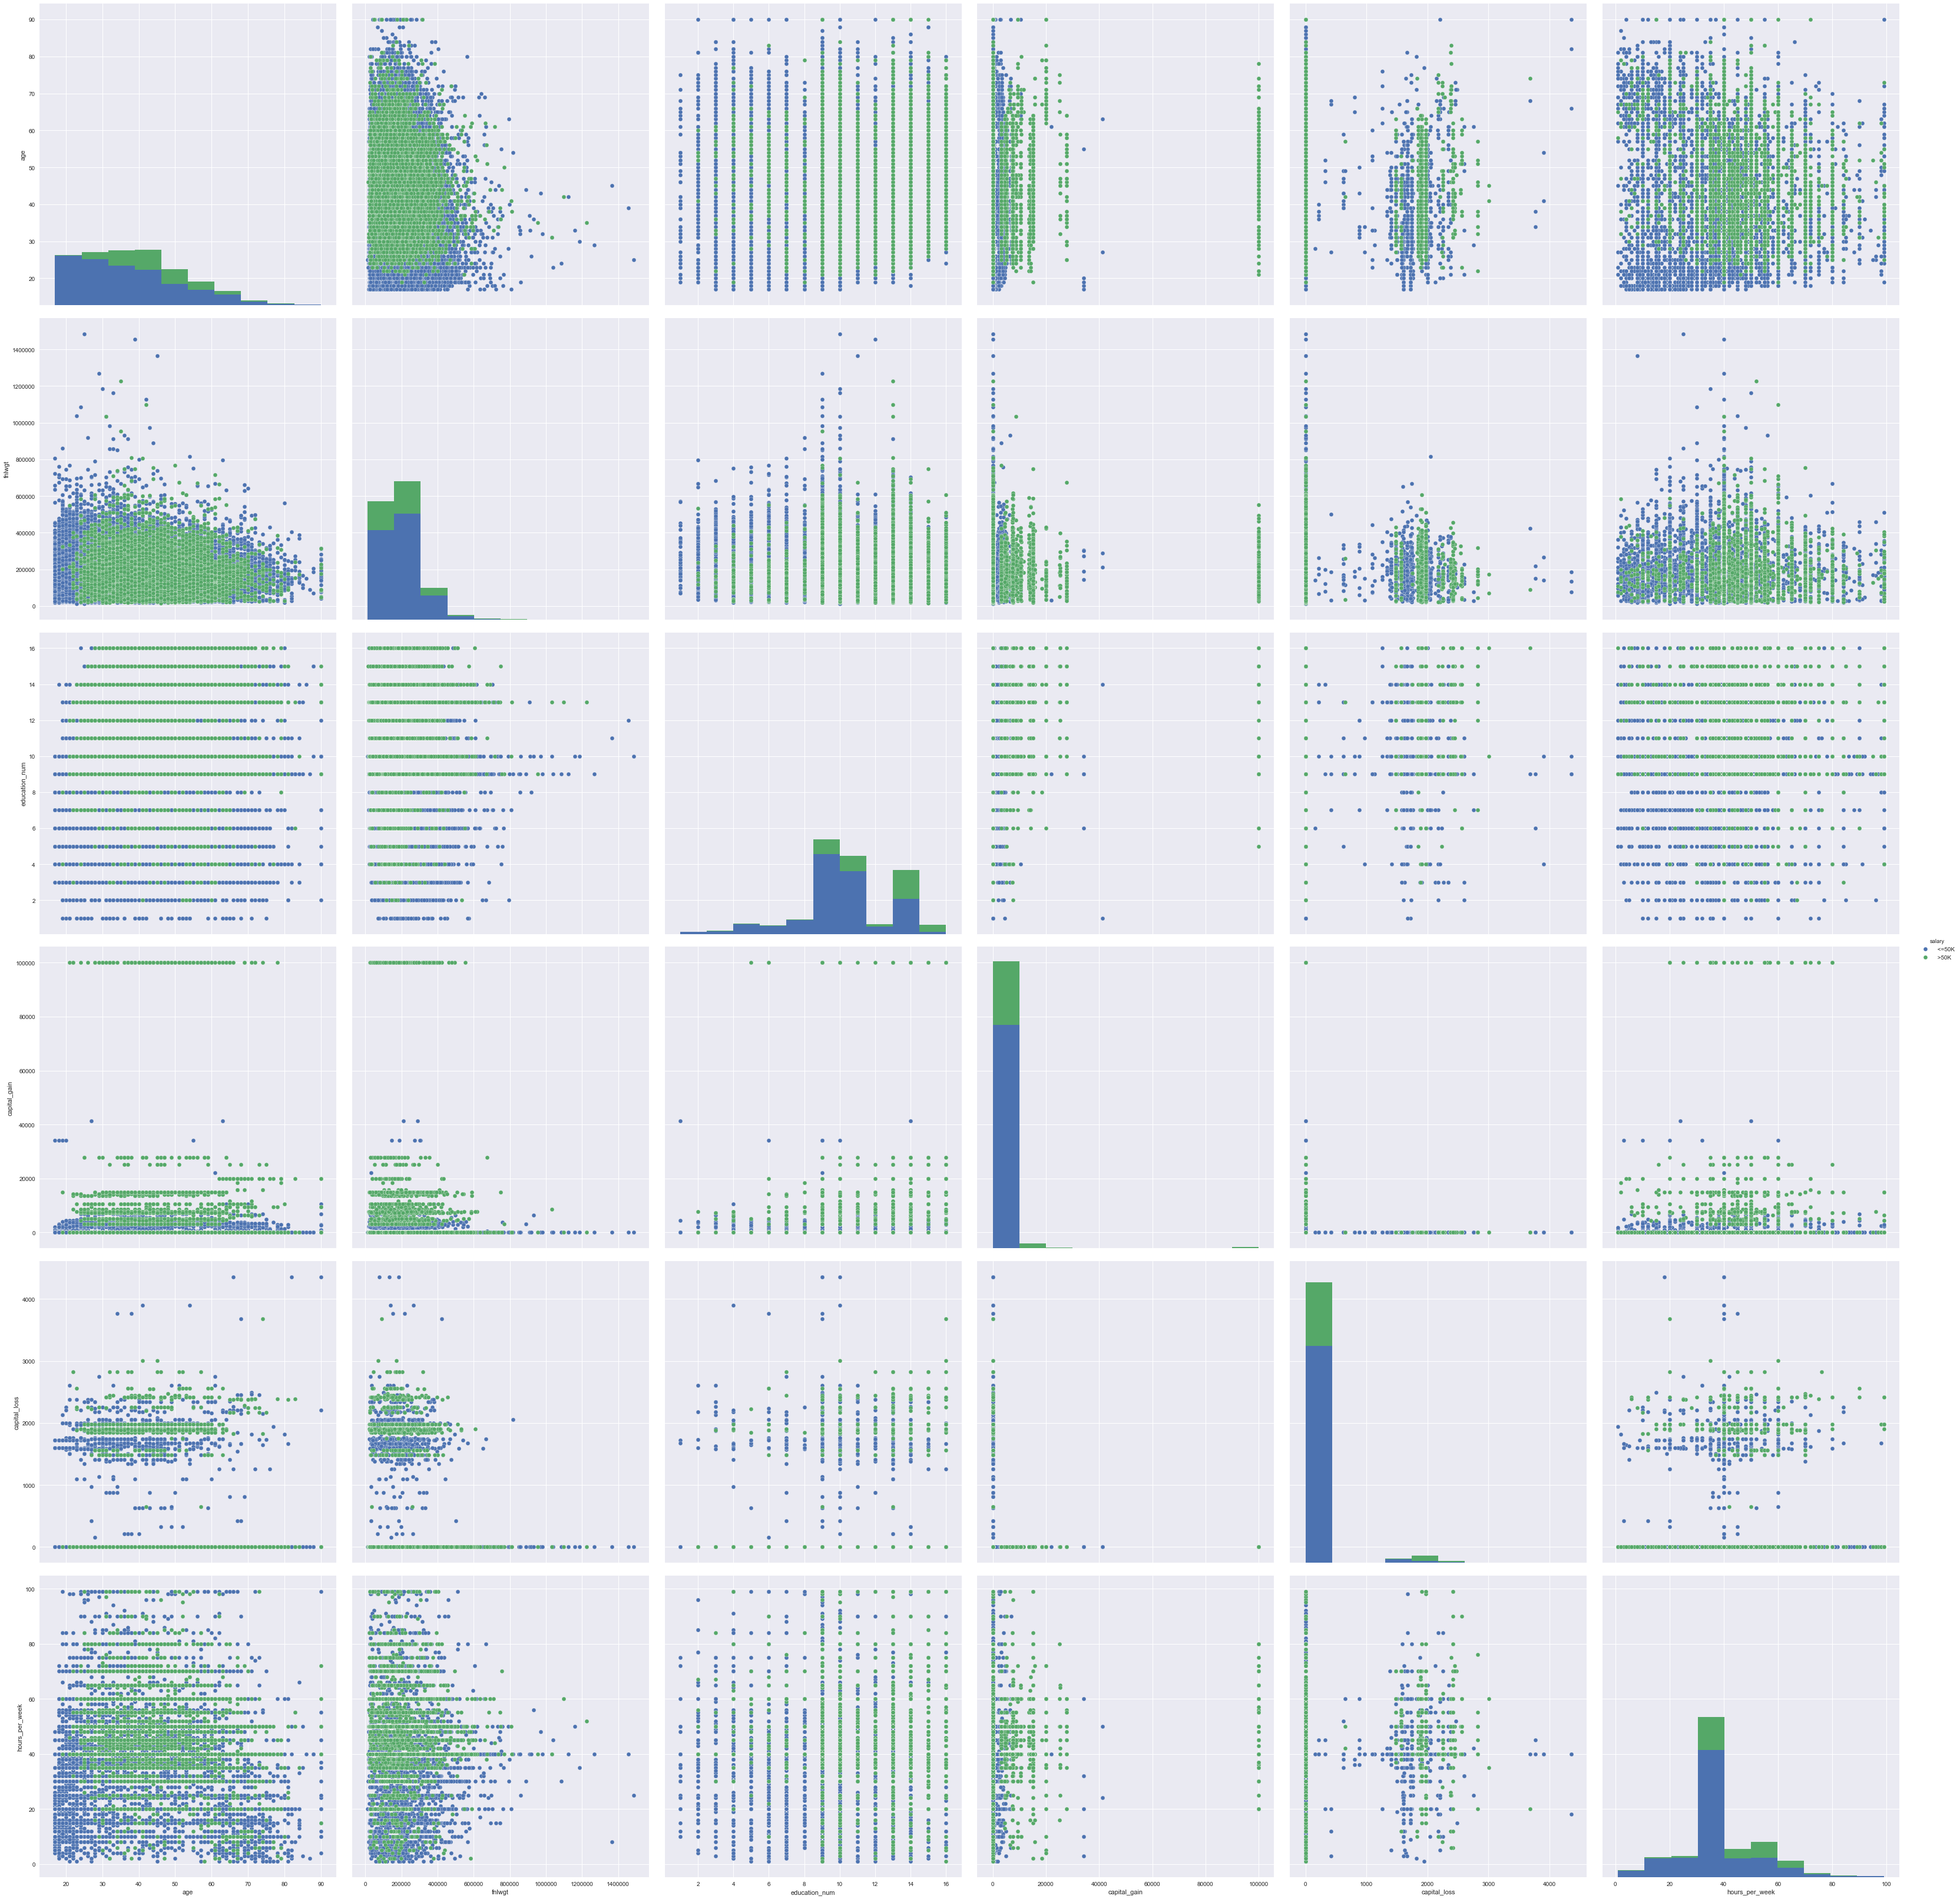

In [165]:
#We have done a pairplot on the available data on the basis of salary whether >50K or <=50K
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(adult, hue = 'salary', size = 7.5)

# Target variable

The target variable in the given dataset is "Salary".
In the following cell, we are just seeing that how many person has Salary <=50K or Salary >50K

In [166]:
#To view how many target variables have salary <=50K and how many have salary >50K
adult.salary.value_counts().sort_index()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

# Cleaning the dataset (Imputation)

Now before modelling the data, we have to do cleaning operations such as finding any null value in the dataset, missing/misplaced data, data with '?', '*' etc characters and so on.
This step is very important because the analysis wil be good only when the data is clean.

In [167]:
#Checking whether any attribute has null value or not.
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

# Checking which columns has " ?" value

In [168]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']:
    print (value,":", sum(adult[value] == ' ?'))

('workclass', ':', 1836)
('education', ':', 0)
('marital_status', ':', 0)
('occupation', ':', 1843)
('relationship', ':', 0)
('race', ':', 0)
('sex', ':', 0)
('native_country', ':', 583)
('salary', ':', 0)


 We found that the columns "workclass", "occupation" and "native_country" has " ?" value which we dont want.
 So we replace " ?" value with the most frequent occuring value in that column.

In [169]:
#Checking the most frequent value in the workclass attribute.
adult["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [170]:
#Checking the most frequent value in the occupation attribute.
adult["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [171]:
#Checking the most frequent value in the native_country attribute.
adult["native_country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [172]:
#Creating a tool which will replace " ?" in each column with the most frequent occuring value in that attribute.
replace_tool = {"workclass": {" ?": "Private"}, "occupation": {" ?": "Prof-specialty"}, "native_country": {" ?": "United-States"}}

In [173]:
adult.replace(replace_tool, inplace = True)

In [174]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [175]:
#The following snippet can be also used to replace " ?" with "NaN". 
#But this method is not recommended.

#defected_columns = ['workclass', 'occupation', 'native_country']
#for col in defected_columns:
#    adult[col] = (adult[col].replace(to_replace=' ?', value=np.nan))
#adult

# Data Modelling & Analysis
(By considering continuous attributes only)


# Pandas DataFrame

We are making 2 Pandas DataFrame: x_adult and y_adult. 
x_adult consists of all the continuous columns from the given dataset.
The continuous columns given are: age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
Our target column is: salary.

In [176]:
import pandas as pd
x_adult = pd.DataFrame([adult.age, adult.fnlwgt, adult.education_num, adult.capital_gain, adult.capital_loss, adult.hours_per_week]).T
y_adult = pd.DataFrame([adult.salary]).T
print (x_adult.shape)
print (y_adult.shape)

(32561, 6)
(32561, 1)


# Training and Testing Datasets

In [177]:
#For modelling the data, we are making 2 separate datasets.
#xtrain and ytrain are to train the model.
#From the developed model, we predict ymodel values for each xtest values.
#Finally we test the model by comparing ymodel with ytest values.
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_adult, y_adult, random_state = 1, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(24420, 6)
(8141, 6)
(24420, 1)
(8141, 1)


# Gaussian Naive Bayes

In [178]:
#First i am using Gaussian Naive Bayes model for fitting and predicting the data.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
#The training score is reported 79.2%.
acc_gauss1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_gauss1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 80.2%.
acc_gauss = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_gauss))

Training accuracy = 79.2
Testing accuracy = 80.3


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K - Nearest Neighbor

In [179]:
#Second i am using K nearest neighbors classifier for predicting the data.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain, ytrain)
#Evaluating the model on the test data set
ymodel = model.predict(xtest)
#The training score is reported 99.9%.
acc_knn1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 73.84%.
acc_knn = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Training accuracy = 99.9
Testing accuracy = 73.84


# Logistic Regression

In [180]:
#Now i am using Logistic regression for predicting the data.
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
#The training score is reported 79.39%.
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
#The accuracy is around 80.74%.
acc_log = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))

Training accuracy = 79.39
Testing accuracy = 80.74


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Machines

In [181]:
#Now i am using Support vector machines for predicting the data.
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
#The training score is reported 99.2%.
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1))
#The accuracy is around 77.26%.
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svc))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 99.2
Testing accuracy = 77.26


# Stochastic Gradient Descent

In [182]:
#Now i am using Stochastic gradient descent model for predicting the data.
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
#The training score is reported 78.5%.
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_sgd1))
#The accuracy is around 80.41%.
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_sgd))

Training accuracy = 78.23
Testing accuracy = 79.58


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

In [183]:
#Now i am using Decision tree for predicting the data.
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
#The training score is reported 99.9%.
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
#The accuracy is around 77.44%.
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 99.9
Testing accuracy = 77.08


# Random Forest

In [184]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy = 99.89
Testing accuracy = 81.12


# Summarizing Results

In [185]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'SVM', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_gauss1, acc_knn1, acc_log1, acc_svc1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_gauss, acc_knn, acc_log, acc_svc, acc_sgd, acc_decision_tree, acc_random_forest]})
models

,Model,Testing Score,Training Score
0,Gaussian Naive Bayes,80.30,79.20
1,KNN,73.84,99.90
2,Logistic regression,80.74,79.39
3,SVM,77.26,99.20
4,Stochastic Gradient Decent,79.58,78.23
5,Decision Tree,77.08,99.90
6,Random Forest,81.12,99.89


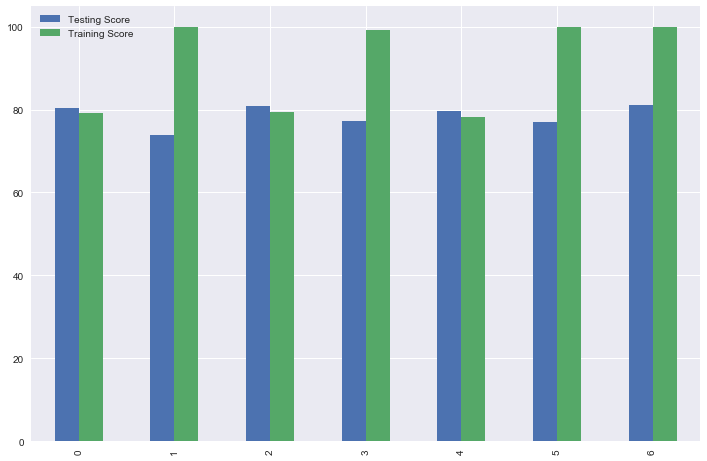

In [186]:
models.plot(kind = 'bar', figsize = (12, 8))

# ROC Curve

I have included an ROC curve on the basis of Random Forest model.
Similar curves can be drawn for every method.

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'True positive rate')

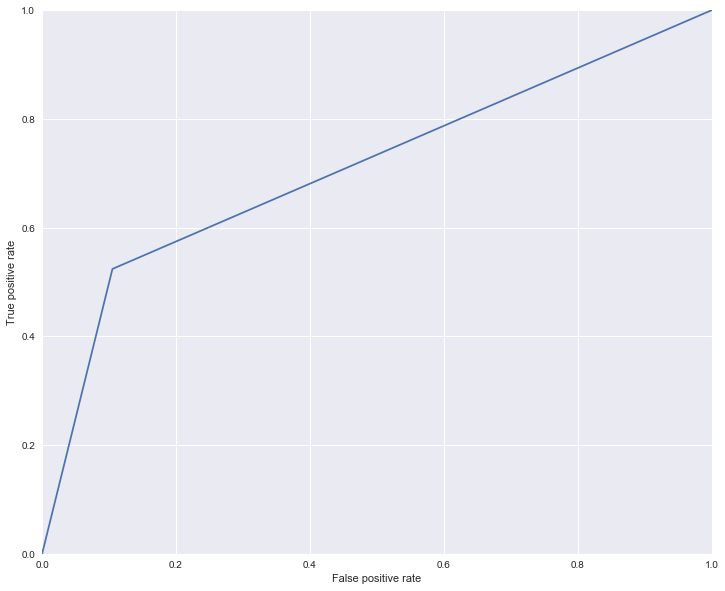

In [187]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (12, 10))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
#thresholds[0] = 0.80
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [188]:
#Loading and displaying the data
import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
#adult

# Cleaning the dataset (Imputation)

Now before modelling the data, we have to do cleaning operations such as finding any null value in the dataset, missing/misplaced data, data with '?', '*' etc characters and so on.
This step is very important because the analysis wil be good only when the data is clean.

In [189]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

# Checking which columns has " ?" value

In [190]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']:
    print (value,":", sum(adult[value] == ' ?'))

('workclass', ':', 1836)
('education', ':', 0)
('marital_status', ':', 0)
('occupation', ':', 1843)
('relationship', ':', 0)
('race', ':', 0)
('sex', ':', 0)
('native_country', ':', 583)
('salary', ':', 0)


 We found that the columns "workclass", "occupation" and "native_country" has " ?" value which we dont want.
 So we replace " ?" value with the most frequent occuring value in that column.

In [191]:
adult["workclass"].value_counts() #This shows "Private" value has highest frequency in "workclass" column.
adult["occupation"].value_counts() #This shows "Prof-Speciality" value has highest frequency in "occupation" column.
adult["native_country"].value_counts() #This shows "United-States" value has highest frequency in "native_country" column.
replace_tool = {"workclass": {" ?": "Private"}, "occupation": {" ?": "Prof-specialty"}, "native_country": {" ?": "United-States"}}
adult.replace(replace_tool, inplace = True)

# Accounting for Categorical variables

The above analysis was done by taking continuous variables in account.
It is more accurate to include categorical data into the analysis as well.
For using the categorical data into our analysis, we first first transform the categorical data into numbers representing them.
This is done by preprocessing the data using "get_dummies" from pandas and then transforming it.

Below is the transformation of categorical data into continuous for further data analysis.

# Preprocessing using pd.get_dummies()

In [192]:
adult = pd.get_dummies(adult, columns=["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"])
print (adult.shape)
adult.head(5)

(32561, 109)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_United-States
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pandas DataFrame

We are making 2 Pandas DataFrame: x_adult and y_adult. 
x_adult consists of all the continuous columns from the given dataset.
The continuous columns given are: age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
Our target column is: salary.

In [193]:
import pandas as pd
y_adult = pd.DataFrame([adult.salary]).T
x_adult = pd.DataFrame(adult)
x_adult = adult.drop(['salary'], axis = 1)
print (x_adult.shape)
print (y_adult.shape)

(32561, 108)
(32561, 1)


# Training and Testing Datasets

In [194]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_adult, y_adult, random_state = 1, test_size = 0.25)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(24420, 108)
(8141, 108)
(24420, 1)
(8141, 1)


# Gaussian Naive Bayes

In [195]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
#The training score is reported 79.2%.
acc_gauss1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_gauss1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 80.2%.
acc_gauss = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_gauss))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 79.19
Testing accuracy = 80.28


0.6250505182861089


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


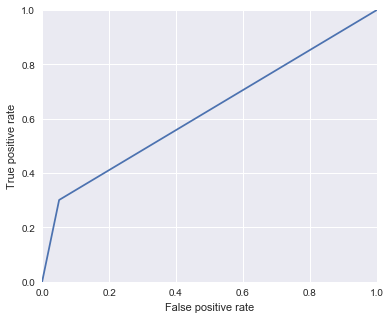

In [196]:
#Area under ROC curve for Gaussian Naive Bayes model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(ymodel)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_gnb = roc_auc_score(y1, y2)
print (area_gnb)

# K - Nearest Neighbor

In [197]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain, ytrain)
#Evaluating the model on the test data set
ymodel = model.predict(xtest)
#The training score is reported 99.9%.
acc_knn1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 73.84%.
acc_knn = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 100.0
Testing accuracy = 73.75


0.649139777817945


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


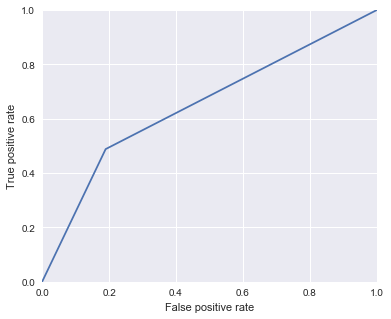

In [198]:
#Area under ROC curve for K-Nearest Neighbor model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(ymodel)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_knn = roc_auc_score(y1, y2)
print (area_knn)

# Logistic Regression

In [199]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
#The training score is reported 79.39%.
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
#The accuracy is around 80.74%.
acc_log = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 79.39
Testing accuracy = 80.79


0.6136571665529844


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


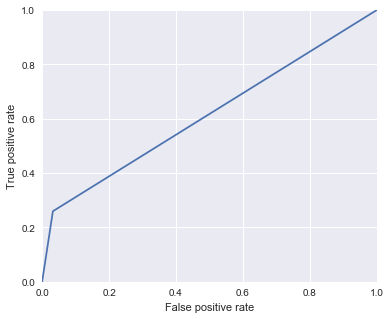

In [200]:
#Area under ROC curve for Logistic Regression model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_lr = roc_auc_score(y1, y2)
print (area_lr)

# Support Vector Machines

In [201]:
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
#The training score is reported 99.2%.
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1))
#The accuracy is around 77.26%.
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svc))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 96.56
Testing accuracy = 77.3


0.5234878739712697


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


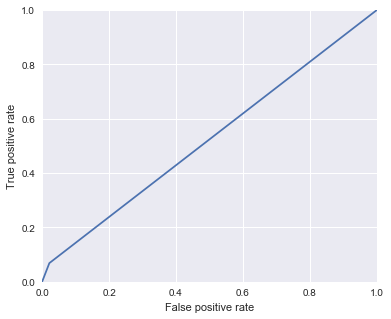

In [202]:
#Area under ROC curve for Support Vector Machines model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_svm = roc_auc_score(y1, y2)
print (area_svm)

# Stochastic Gradient Descent

In [203]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
#The training score is reported 78.5%.
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_sgd1))
#The accuracy is around 80.41%.
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_sgd))

Training accuracy = 77.98
Testing accuracy = 79.02


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6128329480909397


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


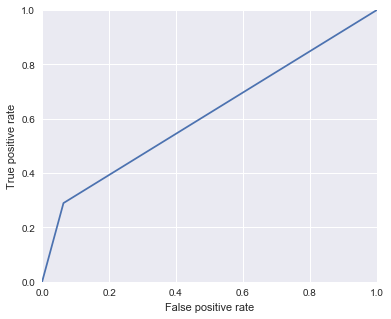

In [204]:
#Area under ROC curve for Stochastic Gradient Descent model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_sgd = roc_auc_score(y1, y2)
print (area_sgd)

# Decision Tree

In [205]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
#The training score is reported 99.9%.
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
#The accuracy is around 77.44%.
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 100.0
Testing accuracy = 81.87


0.7549551079964858


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


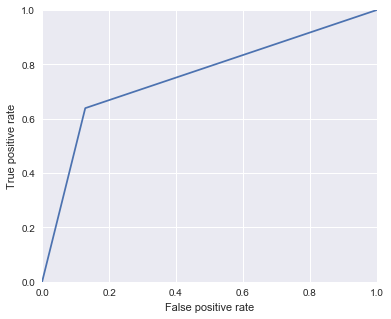

In [206]:
#Area under ROC curve for Support Vector Machines model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_decision_tree = roc_auc_score(y1, y2)
print (area_decision_tree)

# Random Forest

In [207]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy = 100.0
Testing accuracy = 85.74


0.7758963510648417


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


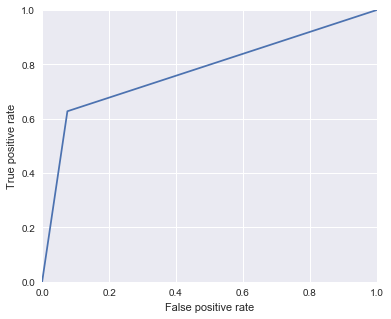

In [208]:
#Area under ROC curve for Support Vector Machines model
temp = pd.DataFrame(ymodel)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y1 = le.fit_transform(ytest)
#y2 = le.fit_transform(temp)
area_random_forest = roc_auc_score(y1, y2)
print (area_random_forest)

# Summarizing Results

In [209]:
roc_area = pd.DataFrame({'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'SVM', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'], 'Area under ROC curve': [area_gnb, area_knn, area_lr, area_svm, area_sgd, area_decision_tree, area_random_forest]})
models_print = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'SVM', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_gauss1, acc_knn1, acc_log1, acc_svc1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_gauss, acc_knn, acc_log, acc_svc, acc_sgd, acc_decision_tree, acc_random_forest]})
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'SVM', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_gauss1, acc_knn1, acc_log1, acc_svc1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_gauss, acc_knn, acc_log, acc_svc, acc_sgd, acc_decision_tree, acc_random_forest],
    'Area under ROC curve': [area_gnb, area_knn, area_lr, area_svm, area_sgd, area_decision_tree, area_random_forest]})
models

,Area under ROC curve,Model,Testing Score,Training Score
0,0.625051,Gaussian Naive Bayes,80.28,79.19
1,0.649140,KNN,73.75,100.00
2,0.613657,Logistic regression,80.79,79.39
3,0.523488,SVM,77.30,96.56
4,0.612833,Stochastic Gradient Decent,79.02,77.98
5,0.754955,Decision Tree,81.87,100.00
6,0.775896,Random Forest,85.74,100.00


# Reporting Scores

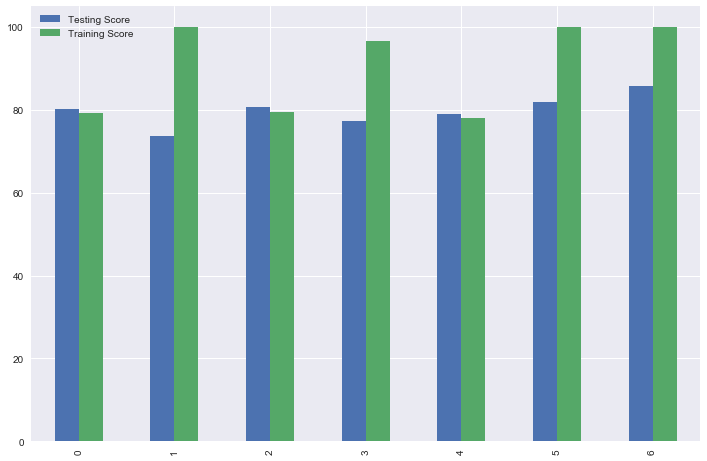

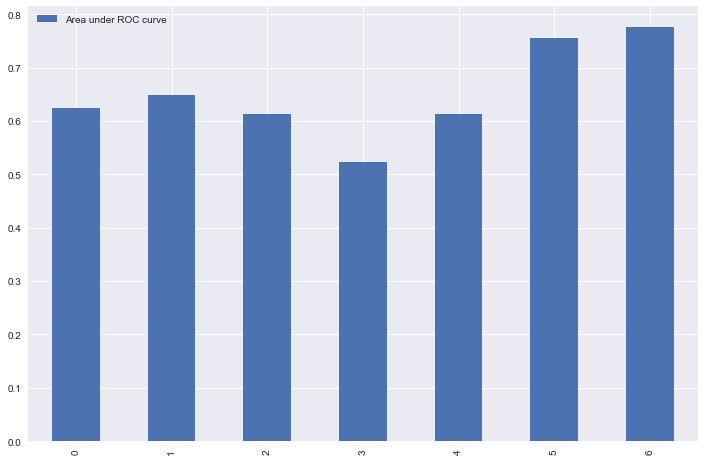

In [210]:
models_print.plot(kind = 'bar', figsize = (12, 8))
roc_area.plot(kind = 'bar', figsize = (12, 8))

# Discussion

From the ROC curve presented for each model, we can see that the Random Forest model has the highest area under the ROC curve. The Random Forest model has also 85.74% and 100% testing and training scores respectively.
So, for this problem, the Random Forest model is the best suited model and should be used to make future predictions.

In [211]:
#Loading and displaying the data
import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult.shape

(32561, 15)

# Preprocessing using Label Encoder

In [212]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
workclass_cat_var = le.fit_transform(adult.workclass)
education_cat_var = le.fit_transform(adult.education)
marital_cat_var   = le.fit_transform(adult.marital_status)
occupation_cat_var = le.fit_transform(adult.occupation)
relationship_cat_var = le.fit_transform(adult.relationship)
race_cat_var = le.fit_transform(adult.race)
sex_cat_var = le.fit_transform(adult.sex)
native_country_cat_var = le.fit_transform(adult.native_country)

# Adding transformed categorical attributes into original dataset

After transforming the categorical data appropriately, we assign the transformed data into the original analysis as a separate attribute.

In [213]:
#initialize the encoded categorical columns
adult['workclass_cat_var'] = workclass_cat_var
adult['education_cat_var'] = education_cat_var
adult['marital_cat_var'] = marital_cat_var
adult['occupation_cat_var'] = occupation_cat_var
adult['relationship_cat_var'] = relationship_cat_var
adult['race_cat_var'] = race_cat_var
adult['sex_cat_var'] = sex_cat_var
adult['native_country_cat_var'] = native_country_cat_var
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,salary,workclass_cat_var,education_cat_var,marital_cat_var,occupation_cat_var,relationship_cat_var,race_cat_var,sex_cat_var,native_country_cat_var
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,0,5


# Removing original untransformed categorical attributes from Dataset

Now since we have replaced the categorical variables with new transformed data, we will probably want to remove the old categorical attributes as those will not be taken into account for analysis further.

In [214]:
#drop the old categorical columns from dataframe
dummy_fields = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
adult = adult.drop(dummy_fields, axis = 1)
print (adult.head())
print (adult.shape)

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   salary  workclass_cat_var  education_cat_var  marital_cat_var  \
0   <=50K                  7                  9                4   
1   <=50K                  6                  9                2   
2   <=50K                  4                 11                0   
3   <=50K                  4                  1                2   
4   <=50K                  4                  9                2   

   occupation_cat_var  relationship_cat_var  race_cat_var  sex_cat_var  \
0                   1                     1           

Viewing the transformed dataset.

In [215]:
adult

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_cat_var,education_cat_var,marital_cat_var,occupation_cat_var,relationship_cat_var,race_cat_var,sex_cat_var,native_country_cat_var
0,39,77516,13,2174,0,40,<=50K,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,<=50K,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,<=50K,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,<=50K,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,<=50K,4,9,2,10,5,2,0,5
5,37,284582,14,0,0,40,<=50K,4,12,2,4,5,4,0,39
6,49,160187,5,0,0,16,<=50K,4,6,3,8,1,2,0,23
7,52,209642,9,0,0,45,>50K,6,11,2,4,0,4,1,39
8,31,45781,14,14084,0,50,>50K,4,12,4,10,1,4,0,39
9,42,159449,13,5178,0,40,>50K,4,9,2,4,0,4,1,39


# Training and Testing Datasets

Now again we split the original dataset into training and test datasets by taking 75% and 25% data into account respectively.

In [216]:
x = pd.DataFrame([adult.age, adult.workclass_cat_var, adult.fnlwgt, adult.education_cat_var, adult.education_num, adult.marital_cat_var, adult.occupation_cat_var, adult.relationship_cat_var, adult.race_cat_var, adult.sex_cat_var, adult.capital_gain, adult.capital_loss, adult.hours_per_week, adult.native_country_cat_var]).T
y = pd.DataFrame([adult.salary]).T
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 7)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)



(24420, 14)
(8141, 14)
(24420, 1)
(8141, 1)


# Gaussian Naive Bayes

In [217]:
#First i am using Gaussian Naive Bayes model for fitting and predicting the data.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
#The training score is reported 79.44%.
acc_gauss1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_gauss1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 79.15%.
acc_gauss = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_gauss))

Training accuracy = 79.5
Testing accuracy = 79.08


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K - Nearest Neighbor
   k = 1

In [218]:
#Second i am using K nearest neighbors classifier for predicting the data.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain, ytrain)
#Evaluating the model on the test data set
ymodel = model.predict(xtest)
#The training score is reported 100%.
acc_knn1 = round(model.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
#The accuracy score is found by comparing ymodel and ytest (which is our ground truth). 
#The accuracy is around 72.92%.
acc_knn = round(accuracy_score(ytest, ymodel) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Training accuracy = 100.0
Testing accuracy = 72.72


# Logistic Regression

In [219]:
#Now i am using Logistic regression for predicting the data.
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
#The training score is reported 79.05%.
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
#The accuracy is around 78.64%.
acc_log = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 80.08
Testing accuracy = 79.7


# Support Vector Machines

In [220]:
#Now i am using Support vector machines for predicting the data.
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
#The training score is reported 99.88%.
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1))
#The accuracy is around 76.09%.
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svc))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 99.89
Testing accuracy = 75.9


# Stochastic Gradient Descent

In [221]:
#Now i am using Stochastic gradient descent model for predicting the data.
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
#The training score is reported 78.1%.
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_sgd1))
#The accuracy is around 77.98%.
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_sgd))

Training accuracy = 79.23
Testing accuracy = 79.25


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

In [222]:
#Now i am using Decision tree for predicting the data.
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
#The training score is reported 100%.
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
#The accuracy is around 80.84%.
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 100.0
Testing accuracy = 81.02


# Random Forest

In [223]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy = 99.98
Testing accuracy = 85.59


# Summarizing Results

We will present the Training as well as Testing score of each models that we have used for data analysis.

In [224]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'SVM', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_gauss1, acc_knn1, acc_log1, acc_svc1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_gauss, acc_knn, acc_log, acc_svc, acc_sgd, acc_decision_tree, acc_random_forest]})
models

,Model,Testing Score,Training Score
0,Gaussian Naive Bayes,79.08,79.50
1,KNN,72.72,100.00
2,Logistic regression,79.70,80.08
3,SVM,75.90,99.89
4,Stochastic Gradient Decent,79.25,79.23
5,Decision Tree,81.02,100.00
6,Random Forest,85.59,99.98


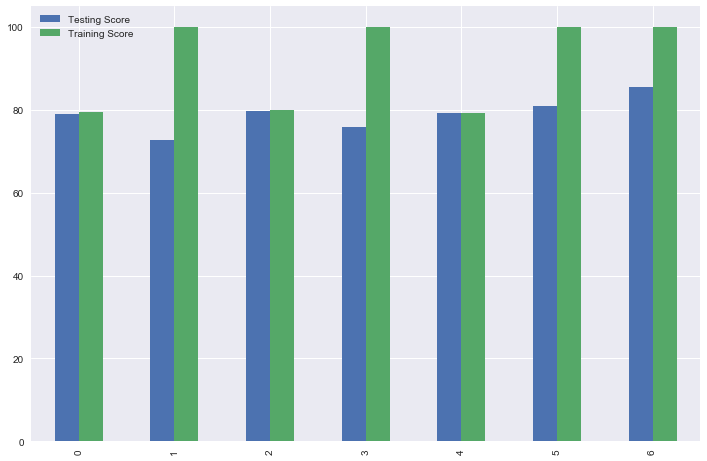

In [225]:
models.plot(kind = 'bar', figsize = (12, 8))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'True positive rate')

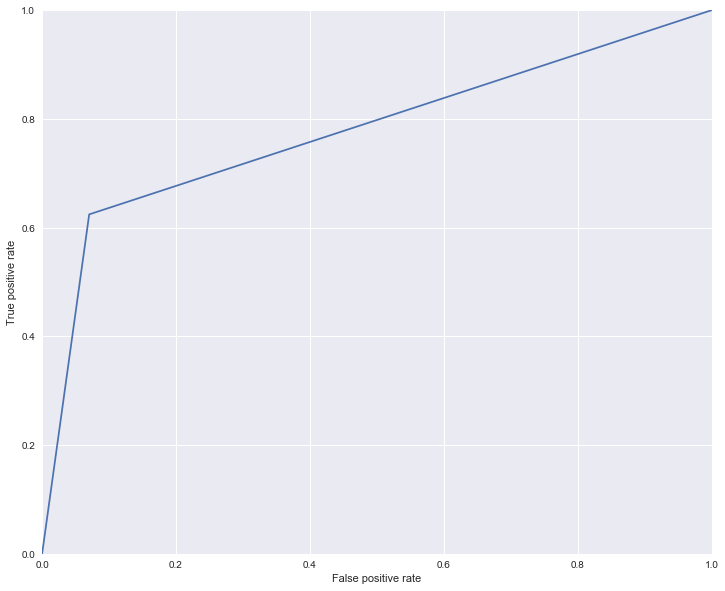

In [226]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (12, 10))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
#thresholds[0] = 0.80
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

## Question 3: Purchasing Insurance

In [227]:
import pandas as pd
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train.head(5)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No


In [228]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
#Caravan_unk

The data above contains 4630 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy. 

Based on a direct marketing problem, the goal is to $predict$ and $interpret$ caravan insurance policy ownership on the basis of product usage and sociodemographic data supplied about the customer.

Consider using all prediction models you learned for the prediction task, suppose your supervisor has limited time and resources to only approach 50 customers.
You are asked to recommend to your supervisor a subset of 50 customers from these 1064 customers in the Caravan_unk file who would most likely buy a caravan policy.
Report **just the row numbers** of your selected 50 customers as they appear in the Caravan_unk file in increasing order (say, row #4, 7, 11, 59, 113, ...), then explain how you come up with this selected subset and your entire modeling process. 

# SOLUTION

# Training and Testing Datasets

We identify the target and non-target attributes in our dataset.
'Purchase' is the target attribute (y_caravan) while all the other attributes are non-target (x_caravan).
Further we split the whole dataset into training (xtrain and ytrain) and testing (xtest and ytest).
We split 75% and 25% between training and testing datasets.

In [229]:
import pandas as pd
x_caravan = pd.DataFrame(Caravan_train).T
x_caravan = x_caravan.drop(['Purchase'])
x_caravan = x_caravan.T
print (x_caravan.shape)
y_caravan = pd.DataFrame([Caravan_train.Purchase]).T
print (y_caravan.shape)
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_caravan, y_caravan, random_state = 1, test_size = 0.25)
#Viewing the shapes and column values after splitting the dataset in training and testing sets.
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)
#print (xtrain.columns.values)
#print (ytrain.columns.values)

(4630, 85)
(4630, 1)
(3472, 85)
(3472, 1)
(1158, 85)
(1158, 1)


# Importing Data Modelling Tools 

Now we import tools for further data operations.
For data analysis, we used pandas, numpy and random.
For visualization, we used matplotlib and seaborn.
For modelling data, we used logistic regression, support vector machines and many more.

In [230]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression

Now since we have already splitted our dataset into training and testing, we will apply various models one by one over the dataset and record their training and testing accuracy.

In [231]:
#LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.15
Testing accuracy = 92.92


0.4986098239110287


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


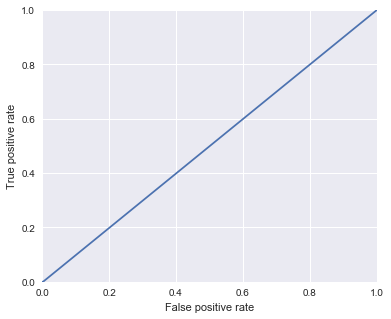

In [232]:
#Area under ROC curve for Logistic Regression model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_lr = roc_auc_score(y1, y2)
print (area_lr)

# Support Vector Machines

In [233]:
#SUPPORT VECTOR MACHINES
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1))
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svc))

C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.27
Testing accuracy = 93.09


0.4995366079703429


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


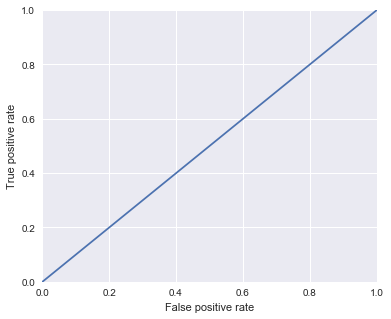

In [234]:
#Area under ROC curve for Support Vector Machines model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_svm = roc_auc_score(y1, y2)
print (area_svm)

# K - Nearest Neighbor

In [235]:
#K-NEAREST NEIGHBOR
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
acc_knn1 = round(knn.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 99.28
Testing accuracy = 89.12


0.5427435154444458


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


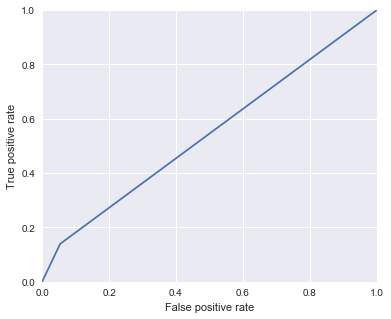

In [236]:
#Area under ROC curve for KNN model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_knn = roc_auc_score(y1, y2)
print (area_knn)

# Perceptron

In [237]:
#PERCEPTRON
perceptron = Perceptron()
perceptron.fit(xtrain, ytrain)
y_pred = perceptron.predict(xtest)
acc_perceptron1 = round(perceptron.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_perceptron1))
acc_perceptron = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_perceptron))

Training accuracy = 94.07
Testing accuracy = 93.18


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


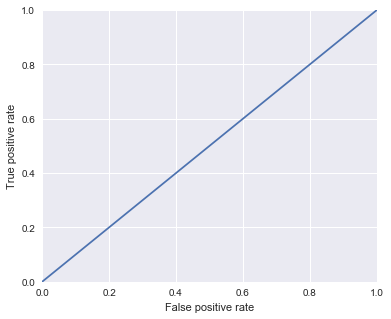

In [238]:
#Area under ROC curve for Perceptron model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_perceptron = roc_auc_score(y1, y2)
print (area_perceptron)

# Stochastic Gradient Descent

In [239]:
#STOCHASTIC GRADIENT DESCENT
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_sgd1))
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_sgd))

Training accuracy = 70.22
Testing accuracy = 69.26


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5534777865111858


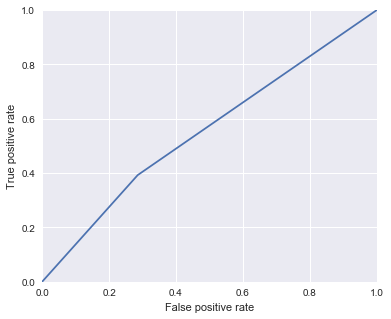

In [240]:
#Area under ROC curve for SGD model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_sgd = roc_auc_score(y1, y2)
print (area_sgd)

# Decision Tree

In [241]:
#DECISION TREE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 99.31
Testing accuracy = 87.48


0.5046104574089932


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


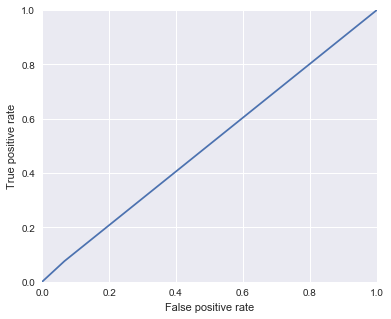

In [242]:
#Area under ROC curve for decision tree model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_decision = roc_auc_score(y1, y2)
print (area_decision)

# Random Forest

In [243]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))

C:\Users\LENOVO\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy = 99.31
Testing accuracy = 92.06


0.5115730692976385


C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


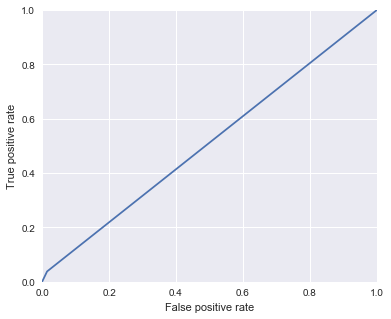

In [244]:
#Area under ROC curve for Random Forest model
temp = pd.DataFrame(y_pred)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(y_pred)
from sklearn import metrics
plt.figure(figsize = (6, 5))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#auc = metrics.roc_auc_score(ytest, y_pred)
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest)
y2 = le.fit_transform(temp)
area_random = roc_auc_score(y1, y2)
print (area_random)

# Summarizing Results

Now framing the various models used in the modelling process according to its training and testing accuracy and reporting the results in a tabulated form.

In [245]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_log1, acc_svc1, acc_knn1, acc_perceptron1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_log, acc_svc, acc_knn, acc_perceptron, acc_sgd, acc_decision_tree, acc_random_forest]})
roc_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Area under ROC': [area_lr, area_svm, area_knn, area_perceptron, area_sgd, area_decision, area_random]})
results_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Training Score': [acc_log1, acc_svc1, acc_knn1, acc_perceptron1, acc_sgd1, acc_decision_tree1, acc_random_forest1],
    'Testing Score': [acc_log, acc_svc, acc_knn, acc_perceptron, acc_sgd, acc_decision_tree, acc_random_forest],
    'Area under ROC': [area_lr, area_svm, area_knn, area_perceptron, area_sgd, area_decision, area_random]})
results_table

,Area under ROC,Model,Testing Score,Training Score
0,0.498610,Logistic Regression,92.92,94.15
1,0.499537,Support Vector Machines,93.09,94.27
2,0.542744,KNN,89.12,99.28
3,0.500000,Perceptron,93.18,94.07
4,0.553478,Stochastic Gradient Decent,69.26,70.22
5,0.504610,Decision Tree,87.48,99.31
6,0.511573,Random Forest,92.06,99.31


# Presenting Scores and ROC areas

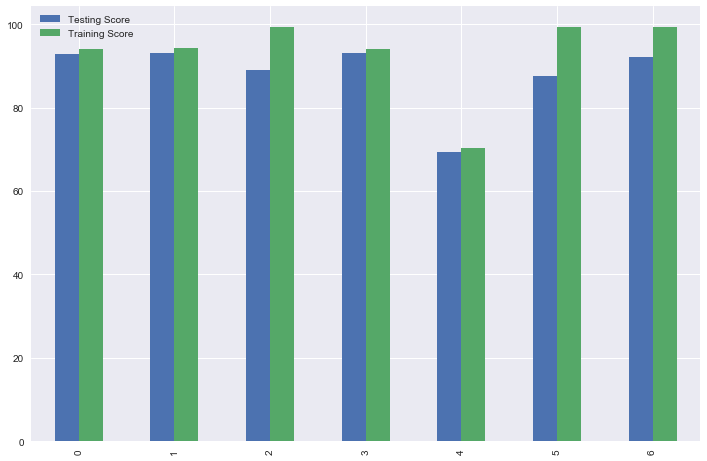

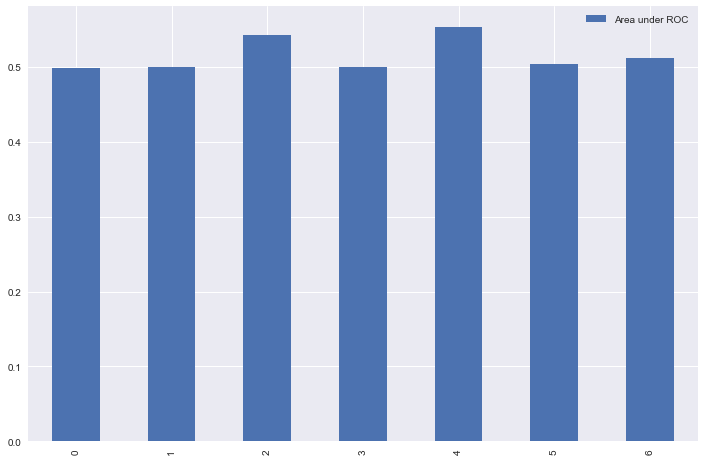

In [246]:
#Plotting the training and testing scores obtained using different models in a bar graph.
models.plot(kind = 'bar', figsize = (12, 8))
roc_table.plot(kind = 'bar', figsize = (12, 8))

# Predicting probabilities

We now predict the probabilities of customers to show how likely they can buy the caravan insurance depending upon the Random forest model

In [247]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
probs = forest.predict_proba(Caravan_unk)[:,1]
#print (probs[0:50])

# Inserting probabilities in the dataset

In [248]:
probs = pd.DataFrame(probs)
probs.columns = probs.columns +1
probs.index = probs.index 
probs.dtypes

1    float64
dtype: object

In [249]:
new_table = pd.merge(Caravan_unk, probs, left_index=True, right_index=True)
new_table.head(5)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,1
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,1,0,1,0,0,0,0.250
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0.391
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.450
3,38,1,3,2,9,2,2,2,4,7,...,0,0,1,0,0,0,0,0,0,0.140
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,1,0,0,0,0,0,0.030


In [250]:
sorted_table = new_table.sort_values(by=[1L], ascending=False) #sort by most likely
sorted_pblty = sorted_table[1L] #only the probabilities

# Top 50 customers who are likely to buy insurance.

The table below shows the probablity of different customers (identified using their ID number) in decending order who are likely to buy the caravan insurance. 

In [251]:
sorted_pblty.head(n=50) #Just the top 50

420     0.880000
136     0.730000
12      0.730000
1004    0.720000
454     0.710000
490     0.690000
162     0.650000
403     0.630000
236     0.630000
912     0.615000
624     0.590000
639     0.583000
319     0.550000
29      0.550000
678     0.545000
703     0.523000
738     0.511667
785     0.500000
1060    0.466976
108     0.460000
76      0.453333
2       0.450000
133     0.440000
805     0.440000
967     0.431333
868     0.430000
644     0.406667
520     0.400000
428     0.398333
651     0.396667
1       0.391000
120     0.380333
458     0.375333
332     0.375000
471     0.370000
123     0.370000
952     0.366667
1015    0.360000
852     0.345000
944     0.340000
811     0.339167
638     0.331667
416     0.330000
921     0.320000
1035    0.320000
277     0.320000
347     0.310000
389     0.310000
285     0.310000
329     0.300000
Name: 1, dtype: float64

# **************Thanks***************